In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
#import V2RhoT_gibbs_lib as lib
from scipy import interpolate
import V2RhoT_gibbs_lib as lib  # Importing the module with the function lithostatic_pressure

In [2]:
def calculate_depth(pressure, density):
    """
    Calculate depth from pressure using lithostatic pressure formula.
    
    Parameters:
    pressure : array-like
        Array of pressure values (in Pascals).
    density : array-like
        Array of density values (in kg/m³).
    
    Returns:
    depth_func : function
        Interpolated function to estimate depth based on pressure.
    """
    # Initialize depth array
    depth = np.zeros(len(pressure))
    
    # Calculate depth for the first index
    if pressure[0] != 0:
        depth[0] = 0  # Starting depth
    else:
        depth[0] = 0  # If pressure is zero, depth is zero
    
    # Now looping through pressures
    for j in range(len(pressure) - 1):
        thickness = (pressure[j + 1] - pressure[j]) / (density[j] * 9.8 * 1e-5)
        depth[j + 1] = depth[j] + thickness * 1e-3  # Convert from m to km

    # Create an interpolation function for depth
    #depth_func = interpolate.interp1d(pressure, depth, fill_value="extrapolate")
    
    return depth

print ('Running Complete')


Running Complete


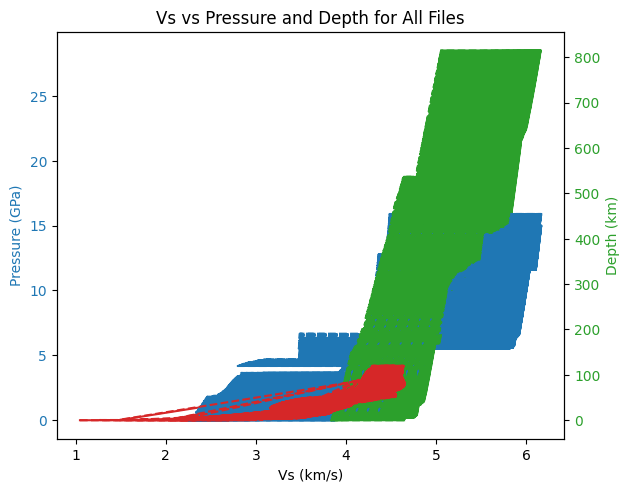

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Load the data from the files
file1_data = np.loadtxt('HP02-dry-CUC.tab', comments='#')
file2_data = np.loadtxt('DMM_HP', comments='#')
file3_data = np.loadtxt('Test_Vs_cleaned.txt', comments='#')

# Extract Vs, Pressure, and Density from File 1 and File 2
P_file1, density_file1, Vs_file1 = file1_data[:, 1], file1_data[:, 2], file1_data[:, 4]
P_file2, density_file2, Vs_file2 = file2_data[:, 1], file2_data[:, 2], file2_data[:, 4]

# Calculate depth for File 1 and File 2 using the calculate_depth function
depth_file1 = calculate_depth(P_file1, density_file1)
depth_file2 = calculate_depth(P_file2, density_file2)

# Extract Vs and Depth from File 3
depth_file3, Vs_file3 = file3_data[:, 2], file3_data[:, 3]

# Calculate pressure for File 3 from depth using a defined function
pressure_file3 = np.array([lib.pressure_inter(dep) for dep in depth_file3])

# Create the plot
fig, ax1 = plt.subplots()

# Plot for File 1 and File 2 (Pressure and Depth vs Vs)
color1 = 'tab:blue'
color2 = 'tab:green'
color3 = 'tab:red'

# Y1 axis (Pressure in GPa)
ax1.set_xlabel('Vs (km/s)')
ax1.set_ylabel('Pressure (GPa)', color=color1)
ax1.plot(Vs_file1, P_file1 / 10000, label='File 1 (HP02-dry-CUC)', color=color1)
ax1.plot(Vs_file2, P_file2 / 10000, label='File 2 (DMM_HP)', color=color2)
ax1.plot(Vs_file3, pressure_file3 / 10000, label='File 3 (Test_Vs_cleaned)', color=color3)
ax1.tick_params(axis='y', labelcolor=color1)

# Y2 axis (Depth in km)
ax2 = ax1.twinx()
ax2.set_ylabel('Depth (km)', color=color2)
ax2.plot(Vs_file1, depth_file1, label='File 1 Depth', linestyle='--', color=color1)
ax2.plot(Vs_file2, depth_file2, label='File 2 Depth', linestyle='--', color=color2)
ax2.plot(Vs_file3, depth_file3, label='File 3 Depth', linestyle='--', color=color3)
ax2.tick_params(axis='y', labelcolor=color2)

# Add a legend and show the plot
fig.tight_layout()
plt.title('Vs vs Pressure and Depth for All Files')
plt.show()


In [15]:
np.isnan(file1_data[:,4])

array([False, False, False, ..., False, False, False])

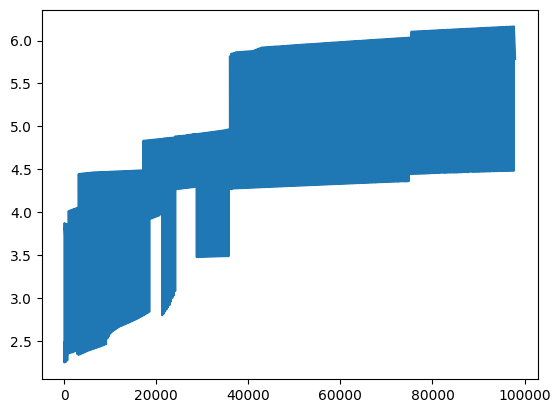

In [16]:
plt.plot(file1_data[:,4])